In [1]:
import pandas as pd
from income import *
import os
import shapefile

## Retrieve Zip Code List ##

In [2]:
zipcode_list = get_bay_area_zipcode()

## Retrieve House Price Data ##

The house price data is downloaded from [Zillow](https://www.zillow.com/research/data/), that has the house price from 1996 to 2018. For this project, we will use the most recent house price.

In [3]:
def load_data(file_name):
    
    df = pd.read_csv(file_name, na_filter=False)
        
    # drop instance with missing values
    df = df.replace("", pd.np.nan).dropna(how='any')
    
    # convert values to int data type
    y = "1996"
    m = "04"
    date = y + "-" + m
    while date != "2018-02":        
        df[date] = df[date].apply(pd.to_numeric)       
        if m == "12":
            m = "01"
            y = str(int(y)+1)
        else:
            m = int(m)+1
            if m < 10:
                m = "0"+str(m)
            else:
                m = str(m)       
        date = y + "-" + m
    
    # convert zipcode to string data type
    df['RegionName'] = df['RegionName'].apply(str)
    
    # set zipcode as index
    df.set_index('RegionName', inplace=True)
    return df

houses = load_data("homes_CA.csv")

In [4]:
houses.head()

,﻿RegionID,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,...,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02
RegionName,,,,,,,,,,,,,,,,,,,,,
93306,97222,Bakersfield,CA,Bakersfield,Kern,333,86800,87100,87500,88200,...,186300,186300,186500,187000,187700,188500,189400,190600,192100,193700
93307,97223,Bakersfield,CA,Bakersfield,Kern,343,67000,66800,67100,67800,...,159100,159600,159400,159200,159900,160300,160800,161500,162600,164000
93309,97225,Bakersfield,CA,Bakersfield,Kern,348,89000,89200,89100,88700,...,188300,189300,189700,190300,191200,191900,192000,192200,193200,194500
93308,97224,Oildale,CA,Bakersfield,Kern,587,82700,83500,84000,84700,...,190000,190500,191000,191100,191000,191100,191700,191800,192600,194100
93312,97227,Bakersfield,CA,Bakersfield,Kern,747,132400,132300,132300,131900,...,272500,272700,272500,272900,273800,274700,275600,276600,277900,279600


## Get the Most Recent House Price ##

In [5]:
def get_most_recent_houseprice(df):
    house_price = df[["2018-02"]].copy()
    house_price.rename(columns={"2018-02": "price"}, inplace=True)
    return house_price

most_recent_houseprice = get_most_recent_houseprice(houses)   

In [6]:
most_recent_houseprice.head()

,price
RegionName,
93306,193700
93307,164000
93309,194500
93308,194100
93312,279600


## Retrieve Shape Data ##

In [7]:
raw_data = download_zipcode_shapefile()
shape_records = shapefile.Reader(raw_data).shapeRecords()

In [8]:
filtered_shape_records = filter_shape_record(shape_records, zipcode_list)

## Plot ##

In [9]:
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib import cm as cmx

In [10]:
def get_normalized_df(df):
 
    return (df - df.min()) / (df.max() - df.min())

normalized_df = get_normalized_df(most_recent_houseprice)
print(normalized_df.get_value("94558", "price"))


0.0987472787686667


In [11]:
def plot_shape_price(shape_records, df):
    plt.figure()
    for sr in shape_records:
        index = sr.record[0]
        try:
            val = df.get_value(index, "price")
        except KeyError:
            continue
        x = [i[0] for i in sr.shape.points[:]]
        y = [i[1] for i in sr.shape.points[:]]
        plt.fill(x, y, get_heapmap_color_hex(val))
    plt.show()    

In [12]:
plt.rcParams["figure.figsize"] = [6, 10] # Size: [width, height]


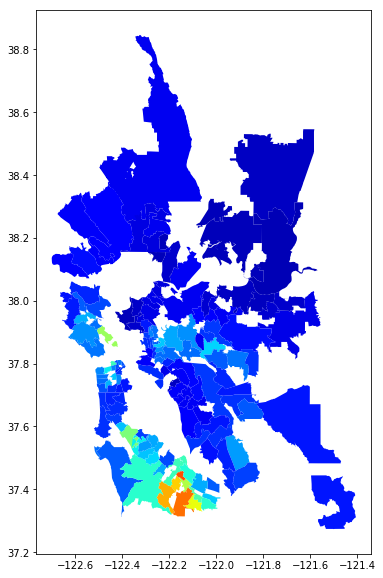

In [13]:
plot_shape_price(filtered_shape_records, normalized_df)
